<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_products.info()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [6]:
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    
La razón del porque no te aparecen todos los valores del dataframe `order_products` es porque es contiene mucha información y pandas trata de optimizar esto al no mostrar los resultados, pero le podemos indicar que lo haga de cualquier manera utilizando el siguiente argumento:
    
```
order_products.info(show_counts=True)    
```    
</div>


## Conclusiones

Al llamar a .info() las columnas mostraban una separación de ; y se debe utilizar sep para cambiarlo, después de esa el df de cada uno muestra información correcta

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
filas_duplicadas = orders[orders.duplicated()]
duplicados = orders.duplicated().sum()

print(filas_duplicadas)
print(duplicados)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
pedidos_miercoles_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(len(pedidos_miercoles_2am))
print(pedidos_miercoles_2am.head())

121
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado?

In [10]:
orders_clean = orders.drop_duplicates(subset=['order_id', 'user_id', 'order_dow', 'order_hour_of_day'])

print(orders_clean)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
duplicados = orders_clean.duplicated().sum()
print(duplicados)

0


In [12]:
ids_duplicados = orders_clean['order_id'].duplicated().sum()

print(ids_duplicados)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Los duplicados fueron eliminados correctamente peor estos se guardaron en la variable `orders_clean` la cual no vuelve a utilizarse después, recomiendo guardar los cambios en la misma variable que se seguirá usando
</div>


### `products` data frame

In [13]:
filas_duplicadas = products.duplicated().sum()

print(filas_duplicadas)

0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
id_duplicadas = products.duplicated().sum()

print(id_duplicadas)

0


In [15]:
productos_duplicados = products['product_name'].str.upper().duplicated()
print(productos_duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool


In [16]:
productos_con_nombre = products[products['product_name'].notna()]
duplicados = productos_con_nombre['product_name'].duplicated()

print(duplicados.drop_duplicates())

0    False
Name: product_name, dtype: bool


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
filas_duplicadas = departments.duplicated().sum()

print(filas_duplicadas)

0


In [18]:
ids_duplicados = departments['department_id'].duplicated().sum()

print(ids_duplicados)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
filas_duplicadas = aisles.duplicated().sum()

print(filas_duplicadas)

0


In [20]:
ids_duplicados = aisles['aisle_id'].duplicated().sum()

print(ids_duplicados)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
filas_duplicadas = order_products.duplicated().sum()

print(filas_duplicadas)


0


In [22]:
duplicados_order_product = order_products[['order_id', 'product_id']].duplicated().sum()
print(duplicados_order_product)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
valores_ausentes = products['product_name'].isna().sum()

productos_sin_nombre = products[products['product_name'].isna()]

print(productos_sin_nombre)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


múltiples productos ausentes en el mismo pasillo y del mismo departamento


Es correcto, solamente de ese pasillo

Describe brevemente cuáles son tus hallazgos.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


De manera sencilla, correcto

In [26]:
pasillo_100 = aisles[aisles['aisle_id'] == 100]

departamento_21 = departments[departments['department_id'] == 21]

print("Pasillo ID 100:", pasillo_100)
print()
print("Departamento ID 21:", departamento_21)

Pasillo ID 100:     aisle_id    aisle
99       100  missing

Departamento ID 21:     department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
productos_unknown = products[products['product_name'] == 'Unknown']
print(len(productos_unknown))

valores_ausentes_despues = products['product_name'].isna().sum()
print(valores_ausentes_despues)

0
1258


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta, pero los cambios se deben guardar en la misma variable que se usará después
</div>


### `orders` data frame

In [28]:
valores_ausentes = orders['days_since_prior_order'].isna().sum()
valores_sin_nombre = orders[orders['days_since_prior_order'].isna()]
print(valores_sin_nombre)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


No hay pedido anterior

### `order_products` data frame

In [30]:
valores_ausentes = order_products['add_to_cart_order'].isna().sum()
valores_sin_nombre = order_products[order_products['add_to_cart_order'].isna()]
print(valores_sin_nombre)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
minimo = order_products['add_to_cart_order'].min()
maximo = order_products['add_to_cart_order'].max()

print(maximo, minimo)

64.0 1.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
filas_ausentes = order_products[order_products['add_to_cart_order'].isna()]
pedidos_ausentes = filas_ausentes['order_id'].unique()

print(f"Número de pedidos con valores ausentes: {len(pedidos_ausentes)}")
print(f"Primeros 5 pedidos: {pedidos_ausentes[:5]}")

Número de pedidos con valores ausentes: 70
Primeros 5 pedidos: [2449164 1968313 2926893 1717990 1959075]


In [33]:

# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido
pedidos_ausentes = order_products[order_products['add_to_cart_order'].isna()]
conteo_productos = pedidos_ausentes.groupby('order_id')['product_id'].count()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
minimo_productos = conteo_productos.min()
print(minimo_productos)

print(conteo_productos.describe())

todos_mas_de_64 = (conteo_productos > 64).all()
print(todos_mas_de_64)

1
count    70.000000
mean     11.942857
std      12.898585
min       1.000000
25%       3.000000
50%       7.000000
75%      14.000000
max      63.000000
Name: product_id, dtype: float64
False


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [34]:
# Código del revisor
order_products[order_products['order_id'].isin(pedidos_ausentes['order_id'])].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

In [35]:

# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
check_999 = order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

print(check_999)

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:

min_max = orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max()
dia_min_max = orders['order_dow'].min(), orders['order_dow'].max()
print(min_max)
print(dia_min_max)

(0, 23)
(0, 6)


Comienza sin ningún problema de lunes a domingo, también en las horas marcadas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

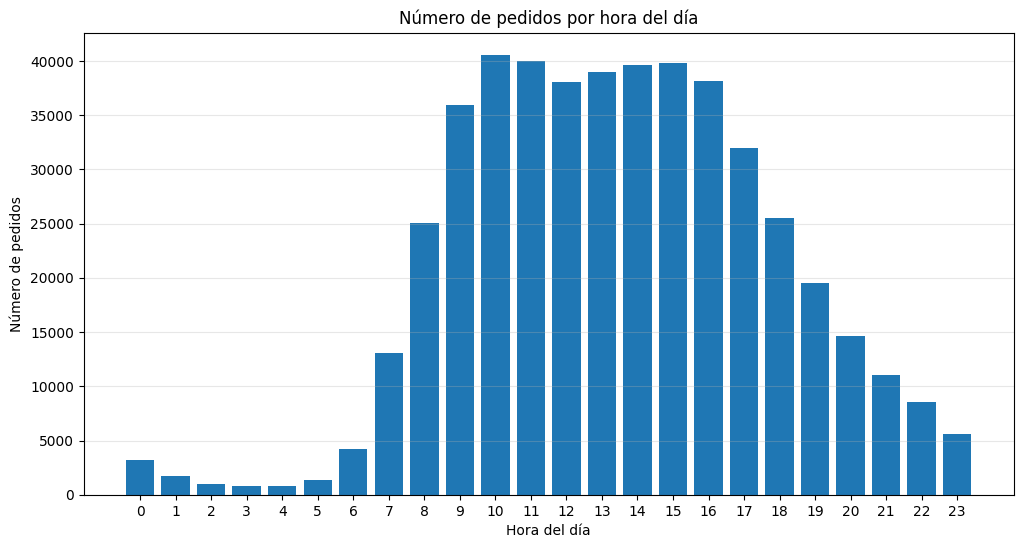

In [38]:
pedidos_por_hora = orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(pedidos_por_hora.index, pedidos_por_hora.values)
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)

plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: order_dow, dtype: int64


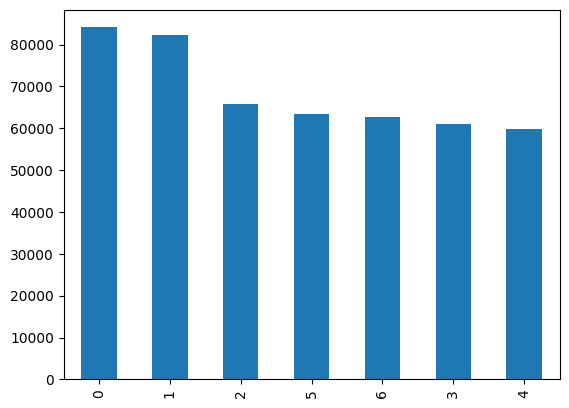

In [39]:
pedidos_por_día = orders['order_dow'].value_counts()

print(pedidos_por_día)

pedidos_por_día.plot(kind='bar')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


Los días de la semana donde se realizan más pedidos son los lunes y martes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

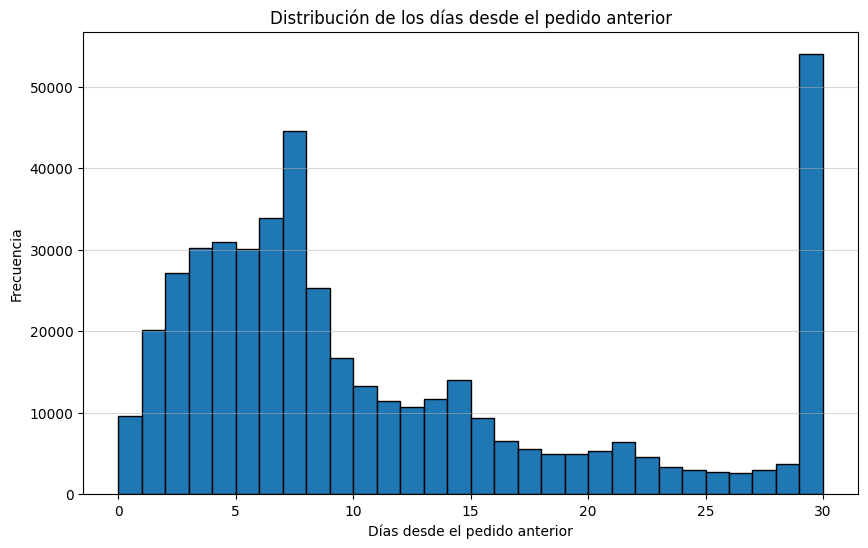

In [40]:
orders['days_since_prior_order'].plot(
    kind='hist', 
    bins=30, 
    title='Distribución de los días desde el pedido anterior',
    figsize=(10, 6),
    edgecolor='black'
)

plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
miercoles = orders[orders['order_dow'] == 3]
print(miercoles)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
6        2511640   148233            40          3                  8   
16       3109465    55090            19          3                 15   
28        133707   182261             1          3                 10   
30       1890318   193501             3          3                 15   
35        125325   106853             6          3                 19   
...          ...      ...           ...        ...                ...   
478917    972799    89702             4          3                  7   
478946   2406747    63101            11          3                  8   
478956    640934    27104             9          3                 10   
478963   3270802   112087             2          3                 13   
478965    216274     4391             3          3                  8   

        days_since_prior_order  
6                          2.0  
16                         9.0  
28                      

In [42]:
sabados = orders[orders['order_dow'] == 6]
print(sabados)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
20         50934   178510             9          6                  9   
26       1844247   122558             4          6                 18   
...          ...      ...           ...        ...                ...   
478924   3274344   145367            13          6                 10   
478930    489820     7287            14          6                 19   
478943    548902     6829             3          6                 10   
478954    984024    47076             2          6                 21   
478961   3006133    34561             7          6                 10   

        days_since_prior_order  
0                         30.0  
11                         8.0  
14                      

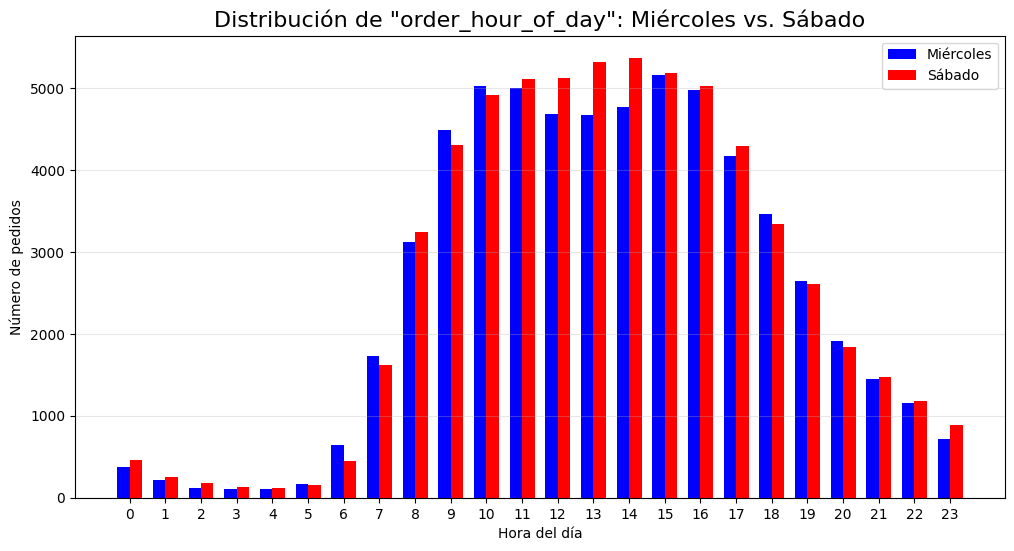

In [43]:
pedidos_miercoles = miercoles['order_hour_of_day'].value_counts().sort_index()
pedidos_sabado = sabados['order_hour_of_day'].value_counts().sort_index()
hours = pd.Series(range(24))
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(hours))  # ← Paréntesis cerrado
ax.bar(x - width/2, pedidos_miercoles.values, width, label='Miércoles', color='blue')
ax.bar(x + width/2, pedidos_sabado.values, width, label='Sábado', color='red')
ax.set_title('Distribución de "order_hour_of_day": Miércoles vs. Sábado', fontsize=16)
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de pedidos')
ax.set_xticks(x)
ax.set_xticklabels(hours)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

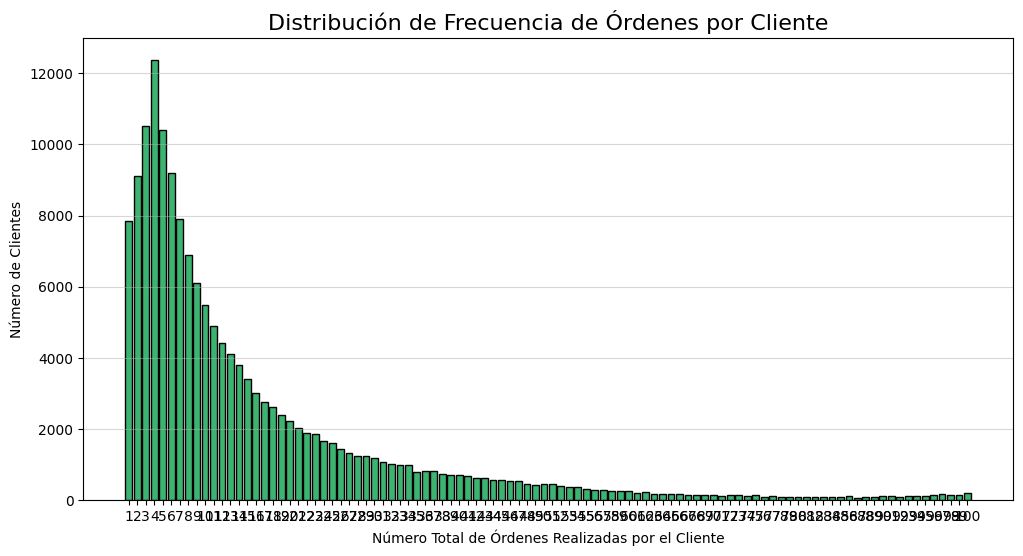

In [44]:
orders_per_user = orders.groupby('user_id')['order_number'].max()
order_frequency = orders_per_user.value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(order_frequency.index, order_frequency.values, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de Frecuencia de Órdenes por Cliente', fontsize=16)
plt.xlabel('Número Total de Órdenes Realizadas por el Cliente')
plt.ylabel('Número de Clientes')
plt.xticks(order_frequency.index)
plt.grid(axis='y', alpha=0.5)
plt.rot=(45)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos

</div>


Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
producto_counts = order_products['product_id'].value_counts()
top_20_productos = producto_counts.head(20)
print(top_20_productos)

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

El conteo de productos es correcto, recomiendo agregar el nombre a cada uno de los productos
</div>


Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
articulos_por_pedido = order_products.groupby('order_id')['product_id'].count()

In [47]:
print(articulos_por_pedido.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


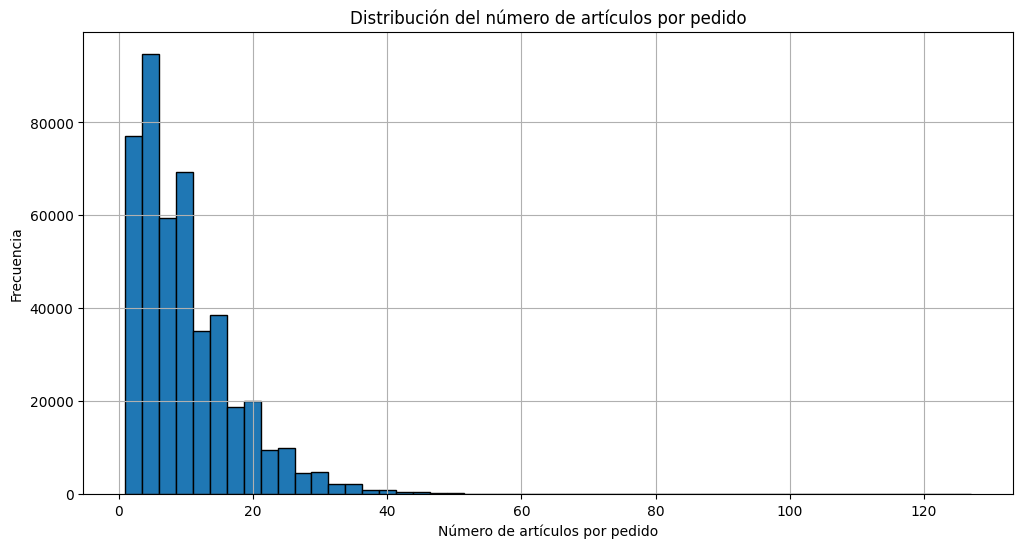

In [48]:
plt.figure(figsize=(12, 6))
articulos_por_pedido.hist(bins=50, edgecolor='black')
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
productos_reordenados = order_products[order_products['reordered'] == 1]

In [50]:
reorden_counts = productos_reordenados['product_id'].value_counts()

In [51]:
top_20_reordenados = reorden_counts.head(20)

In [52]:
top_20_df = pd.DataFrame({'product_id': top_20_reordenados.index, 
                         'reorder_count': top_20_reordenados.values})
resultado = top_20_df.merge(products[['product_id', 'product_name']], on='product_id')

print(resultado)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
total_pedidos = order_products['product_id'].value_counts()

In [54]:
productos_reordenados = order_products[order_products['reordered'] == 1]
reordenes = productos_reordenados['product_id'].value_counts()
tasa_repeticion = reordenes / total_pedidos
tasa_repeticion = tasa_repeticion.fillna(0)  # Para productos nunca reordenados
top_tasas = tasa_repeticion.sort_values(ascending=False).head(20)


In [55]:
print(top_tasas)

14721    1.0
20949    1.0
6723     1.0
6732     1.0
45088    1.0
45078    1.0
21016    1.0
21005    1.0
35192    1.0
35197    1.0
6810     1.0
45040    1.0
45035    1.0
27373    1.0
30748    1.0
45031    1.0
35137    1.0
30747    1.0
35228    1.0
35229    1.0
Name: product_id, dtype: float64


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
orders_products = orders.merge(order_products, on='order_id')
user_stats = orders_products.groupby('user_id').agg({
    'product_id': 'count',
    'reordered': 'sum'
}).rename(columns={'product_id': 'total_productos', 'reordered': 'productos_reordenados'})
user_stats['tasa_repeticion'] = user_stats['productos_reordenados'] / user_stats['total_productos']

In [57]:
print(user_stats)

         total_productos  productos_reordenados  tasa_repeticion
user_id                                                         
2                     26                      1         0.038462
4                      2                      0         0.000000
5                     12                      8         0.666667
6                      4                      0         0.000000
7                     14                     13         0.928571
...                  ...                    ...              ...
206203                27                      6         0.222222
206206                21                     15         0.714286
206207                46                     41         0.891304
206208               125                     87         0.696000
206209                25                      8         0.320000

[149626 rows x 3 columns]


Escribe aquí tus conclusiones

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [58]:
primeros_articulos = order_products[order_products['add_to_cart_order'] == 1]

conteo_primeros_articulos = primeros_articulos['product_id'].value_counts()

top_20_primeros = conteo_primeros_articulos.head(20).reset_index()
top_20_primeros.columns = ['product_id', 'veces_primero']

top_20_final = top_20_primeros.merge(
    products[['product_id', 'product_name']], 
    on='product_id', 
    how='left'
)

In [59]:
print(top_20_final)

    product_id  veces_primero                 product_name
0        24852          15562                       Banana
1        13176          11026       Bag of Organic Bananas
2        27845           4363           Organic Whole Milk
3        21137           3946         Organic Strawberries
4        47209           3390         Organic Hass Avocado
5        21903           3336         Organic Baby Spinach
6        47766           3044              Organic Avocado
7        19660           2336                 Spring Water
8        16797           2308                 Strawberries
9        27966           2024          Organic Raspberries
10       44632           1914   Sparkling Water Grapefruit
11       49235           1797          Organic Half & Half
12       47626           1737                  Large Lemon
13         196           1733                         Soda
14       38689           1397     Organic Reduced Fat Milk
15       26209           1370                        Lim

In [ ]:
A la gente le gustan los plátanos


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


Escribe aquí tus conclusiones

### Conclusion general del proyecto:

In [ ]:
Bastante desafiante, el hecho de intentarlo solo te deja el cerebro frito

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Desarrollar un poco más las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.

</div>

